# Regression in Machine Learning

Regression is a machine learning technique which helps in finding the correlation between variables and enables us to predict the continuous output variable based on the one or more predictor variables.

### Linear Regression
Check with Detailed Notebook:

https://github.com/dltk-ai/DLTK-e-learning/blob/master/ML%20Notebooks/Linear-%20Regression%20.ipynb

### Polynomial Regression
Check with Detailed Notebook:

https://github.com/dltk-ai/DLTK-e-learning/blob/master/ML%20Notebooks/Polynomial-Regression.ipynb

## Lasso Regression

Lasso is an least absolute shrinkage and selection operator is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.


### Lasso Regression is used for?
lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. The lasso does this by imposing a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero.


### Scikit-learn
Scikit-learn is a software machine learning library for the Python. It features various classification, regression and clustering algorithms.


**For more clarification using two datasets for Lasso Regression**

**1. Using Inbulit Boston Housing Dataset**

**2. Using Hitters Salary Dataset**

## 1. Using Boston Housing Dataset


In [457]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

#Importing inbuilt datasets
from sklearn import datasets

#PFor plotting
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

 * " %matplotlib inline " helps in returning output plots without needing to write plt.show() code everytime after each plot!

### Loading Inbuilt Boston Housing Dataset

In [458]:
#loading Inbuilt dataset boston housing
dataset = datasets.load_boston()

### Checking Data Insights

In [459]:
#Checking Shape
dataset.data.shape

(506, 13)

 * Dataset comprises of 506 observations and 13 chracteriestics
 * Out of which one is dependent variable and rest are independent variables.
 * data: contains the information for various houses
 * target: values
 * feature_names: names of the features

In [460]:
#Shows data in the form of array
dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [461]:
#Printing target
dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [462]:
#Provides features of dataset 
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [463]:
#Loading dataset under dataframe, adding columns names as feature_names
data = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [464]:
#Printing Data
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


### Exploratory Data Analysis begins

Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

Adding target variable with name 'MEDV' to our dataset.

In [465]:
#Adding 'MEDV'
data_new = pd.concat([data,pd.Series(dataset.target,name='MEDV')],axis=1)

In [466]:
#Checking with new added feature name
data_new.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [467]:
#Checking with new added feature
data_new.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


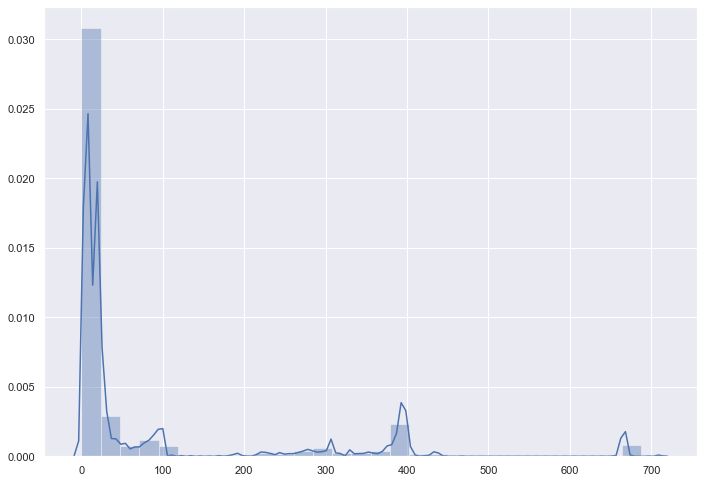

In [468]:
#graph for new dataset
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new, bins=30)
plt.show()

* We see that the values of MEDV are distributed normally with few outliers.
* We create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library, provided heatmap

#### Checking for missing values

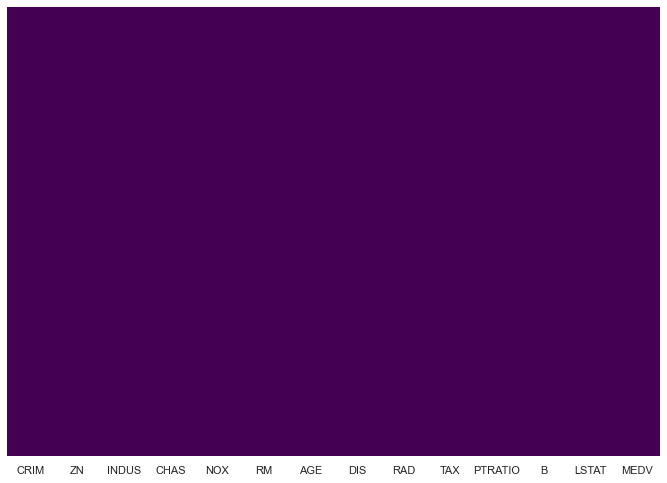

In [469]:
#To Check the missingvalues using heatmap
sns.heatmap(data_new.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

 * Complete cleaned dataset is there
 
 #### To check Correlation

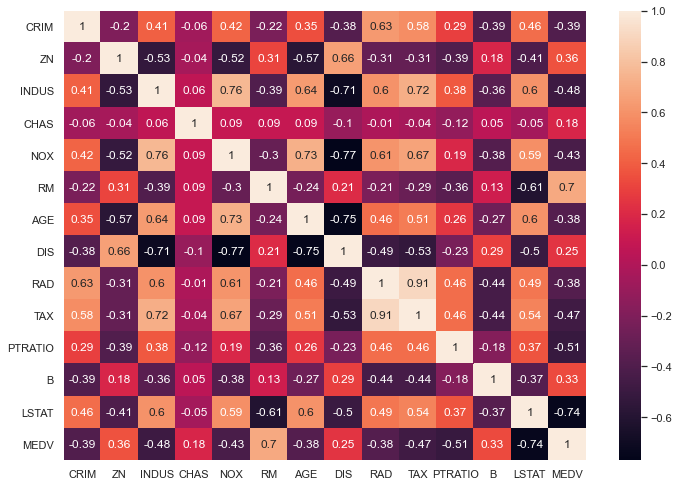

In [470]:
#Correlation check
corr = data_new.corr().round(2)
sns.heatmap(data=corr, annot=True)

#### Check for Data Types

In [471]:
#Checking info of new feature added dataset
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Visualization 
#### Distributions of Variables
* Target Feature as MEDV
* Creating Related Distrubution Graphs

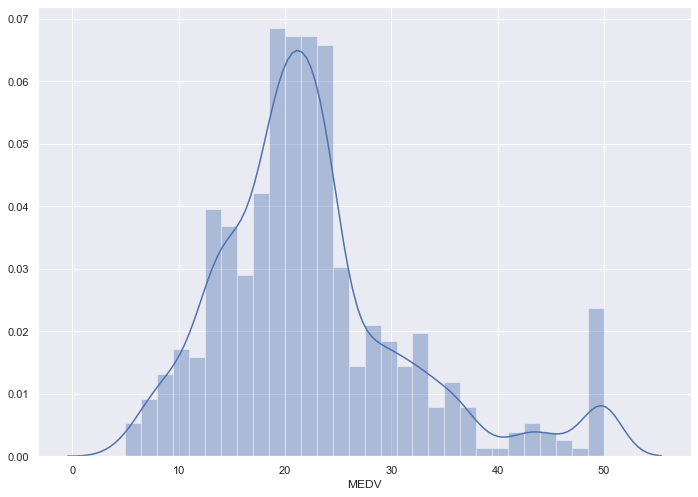

In [472]:
#Creating Histogram for MEDV 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['MEDV'], bins=30)
plt.show() 
 

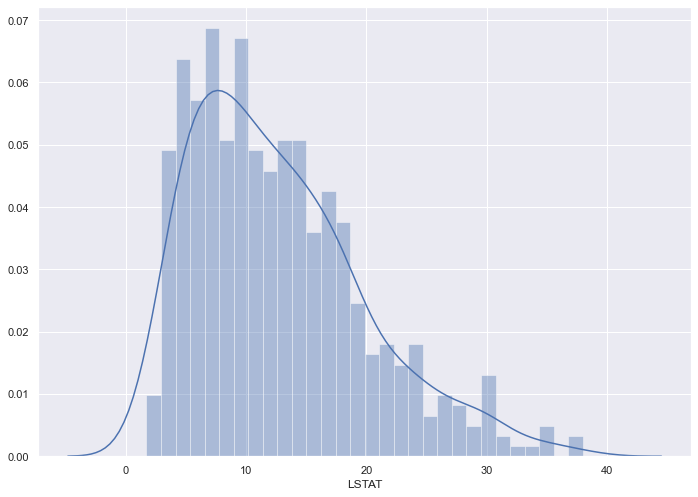

In [473]:
#Creating Histogram for LSTAT
#Percentage of lower status of the population
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['LSTAT'], bins=30)
plt.show() 
 

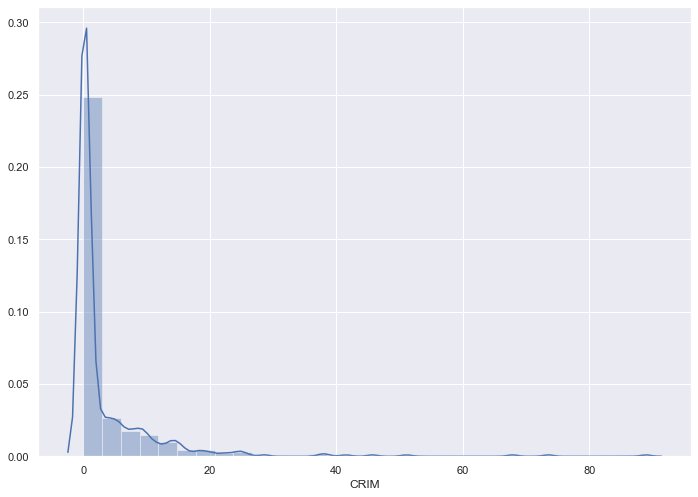

In [474]:
#Plotting Graph for Crimerate CRIM
#Per capita crime rate by town

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['CRIM'], bins=30)
plt.show() 

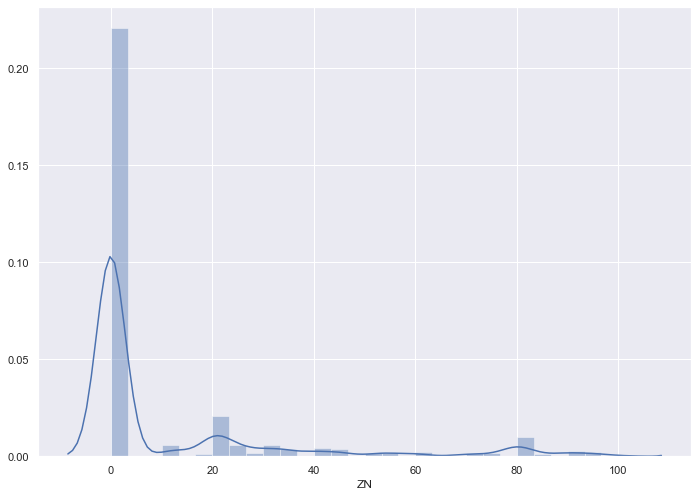

In [475]:
#Plotting graph for ZN - Residential Zone 
#Proportion of residential land zoned for lots over 25,000 sq. ft

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['ZN'], bins=30)
plt.show() 

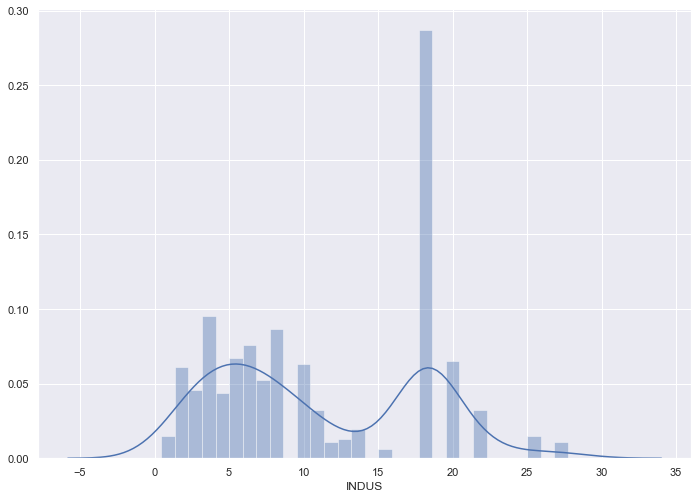

In [476]:
#Plotting graph for INDUS 
#Proportion of non-retail business acres per town
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['INDUS'], bins=30)
plt.show() 

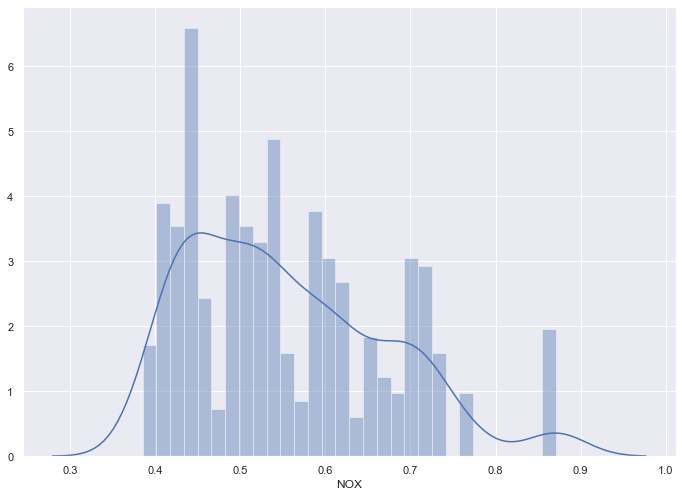

In [477]:
#PLotting a Graph fo NOX
#Nitric oxide concentration (parts per 10 million)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['NOX'], bins=30)
plt.show() 

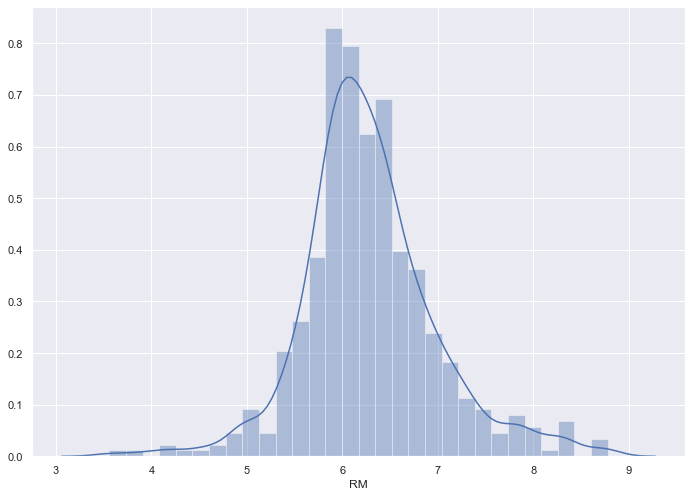

In [478]:
#Plotting a graph for Rooms RM
#Average number of rooms per dwelling
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['RM'], bins=30)
plt.show() 

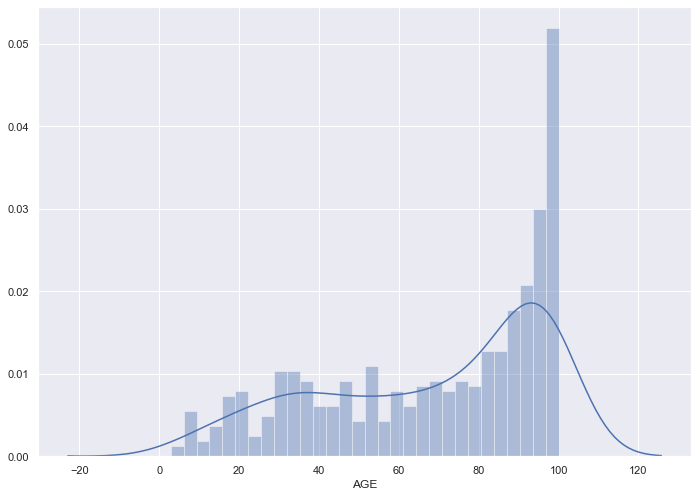

In [479]:
#Plotting a Graph for Age
#Proportion of owner-occupied units built prior to 1940
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['AGE'], bins=30)
plt.show() 

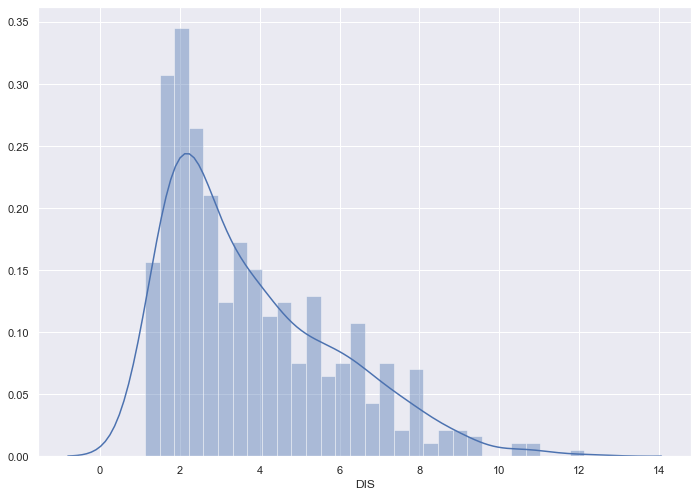

In [480]:
#Plotting a graph for distance DIS
#Weighted distances to five Boston employment centers

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['DIS'], bins=30)
plt.show() 

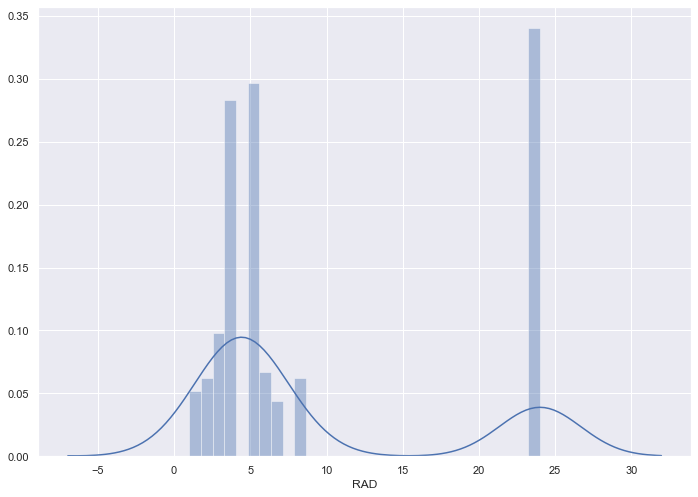

In [481]:
#Plotting a graph for radial highways - RAD
#Index of accessibility to radial highways
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['RAD'], bins=30)
plt.show() 

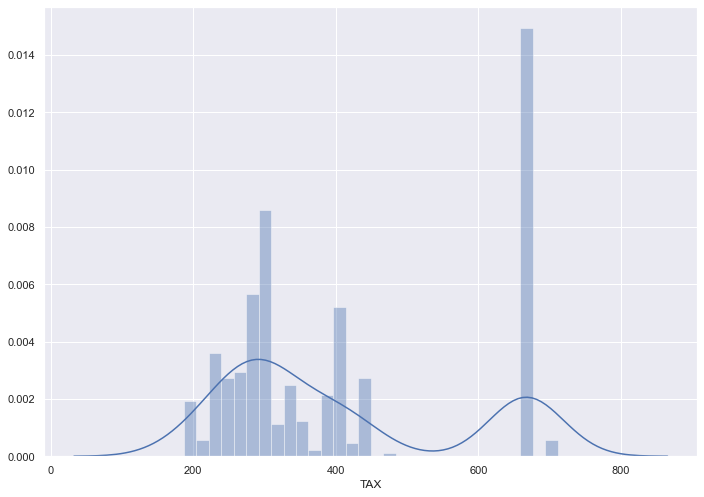

In [482]:
# Plotting graph for tax rate - TAX
#Full-value property tax rate per 10,000

        
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['TAX'], bins=30)
plt.show() 

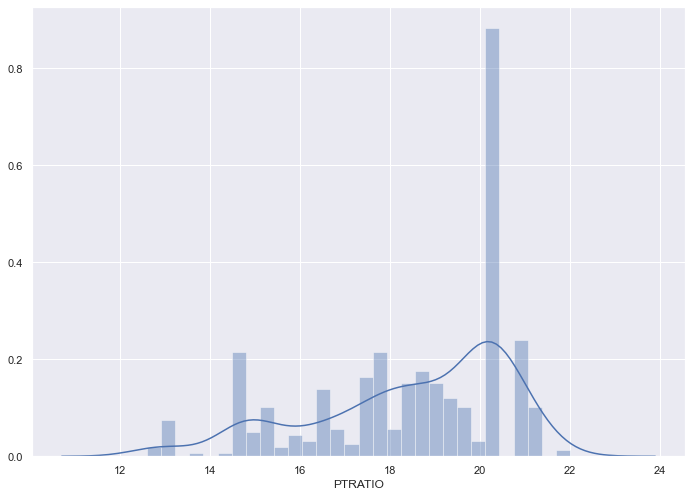

In [483]:
#Plotting a graph pupil
#Pupil-teacher ratio by town
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data_new['PTRATIO'], bins=30)
plt.show() 

### Feature Engineering
* To fit a polynomial regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RAM has a strong positive correlation with MEDV where as LSTAT has a high negative correlation with MEDV

#### Model Training Starts

In [484]:
#Selecting X and y variables
#X feature as 2-D LSTAT from data_new
X = data_new[['LSTAT']]

#y feature as MEDV from data_new
y = data_new[['MEDV']]

In [485]:
#Printing X Feature
X

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33
...,...
501,9.67
502,9.08
503,5.64
504,6.48


In [486]:
#Printing y feature
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


#### Train split data

In [487]:
#Spliting train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state=42,shuffle=True)

In [488]:
#Printing X_train
X_train

,LSTAT
281,4.59
22,18.72
101,7.67
268,3.16
485,10.58
...,...
106,18.66
270,13.00
348,5.99
435,23.27


In [489]:
#Printing X_test
X_test

,LSTAT
173,9.04
274,3.53
491,18.07
72,5.52
452,17.27
76,11.97
316,18.33
140,24.16
471,12.87
500,14.33


In [490]:
#Printing y_train
y_train

,MEDV
281,35.4
22,15.2
101,26.5
268,43.5
485,21.2
...,...
106,19.5
270,21.1
348,24.5
435,13.4


In [491]:
#Printing y_test
y_test

,MEDV
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
76,20.0
316,17.8
140,14.0
471,19.6
500,16.8


#### What is Mean Squared Error?

The mean squared error (MSE) or mean squared deviation (MSD) of an estimator of a procedure for estimating an unobserved quantity which measures the average of the squares of the errors, (i.e) the average squared difference between the estimated values and the actual value. 

If MSE value is near to Zero, give good performance of model.

### Lasso Regression

In [492]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#Loading Lasso model
lasso_model = Lasso()

#Ranging Alpha values
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

#Loading GridSearchCV Lasso model
lasso_regressor=GridSearchCV(lasso_model,params,scoring='neg_mean_squared_error',cv=5)

#### Model Fitting 

In [493]:
#Fitting model X_train and y_train
lasso_regressor.fit(X_train, y_train)

#Printing Lasso regressor best alpha value to be taken.
alpha_value = lasso_regressor.best_params_
print("Printing Lasso regressor best alpha value", alpha_value)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6055.43166728731, tolerance: 3.241137282967033
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6283.149443074386, tolerance: 2.9842266703296705
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6333.297685954656, tolerance: 3.1975186813186807
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

Printing Lasso regressor best alpha value {'alpha': 0.01}


* Lasso regression comes with a parameter, alpha , and the higher the alpha , the most feature coefficients are zero. That is, when alpha is *0* , Lasso regression produces the same coefficients as a linear regression.

* Here Alpha value is **0.01** to be considered 

In [494]:
#Printing mse value for Lasso regression

mse_lasso_regressor = lasso_regressor.best_score_
print("Mean Square Error Value for Lasso regression :", mse_lasso_regressor)

Mean Square Error Value for Lasso regression : -40.333049414217726


In [495]:
#Predictions

prediction_lasso=lasso_regressor.predict(X_test)

In [496]:
#Printing Predictions 

prediction_lasso

array([26.03147803, 31.29566863, 17.40431993, 29.39444553, 18.16863072,
       23.23218974, 17.15591892, 11.586004  , 22.3723401 , 20.97747289,
       17.5476282 , 18.33104677, -0.6620765 , 22.878696  , 23.45192909,
       23.52836017, 17.87246029,  5.41419432, 31.83068619, 17.34699662,
       28.37217984, 27.79894674, 13.07641005, 25.42958328, 19.66859066,
       17.33744273, 25.97415472, 16.79287129, 18.16863072, 21.19721225,
       20.63353304, 27.78939286, 21.82776865, 24.93278126, 14.29930732,
       19.58260569, 30.81797438, 25.30538277, 20.66219469, 27.46456077,
       14.47127725, 27.47411465, 31.91667115, 22.16215463, 26.25121738,
       18.32149288, 17.13681115, 28.24797933, 19.10491145, 29.91035531,
       21.9901847 ])

#### What is r2 score?

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It may also be known as the coefficient of determination.

In [497]:
#X_Train Predict 
from sklearn.metrics import r2_score

pred_train_lasso= lasso_regressor.predict(X_train)

train_Pred_lasso_mse = np.sqrt(mean_squared_error(y_train,pred_train_lasso))

print("Printing Train Lasso Mean Squared error:", train_Pred_lasso_mse)

train_r2_score_lasso = r2_score(y_train, pred_train_lasso)

print("Printing Train r2 score Lasso:", train_r2_score_lasso)


Printing Train Lasso Mean Squared error: 6.301933092333348
Printing Train r2 score Lasso: 0.5415339520059796


In [498]:
#X_test predict

pred_test_lasso= lasso_regressor.predict(X_test)

test_Pred_lasso_mse = np.sqrt(mean_squared_error(y_test,pred_test_lasso))

print("Printing Test Lasso Mean Squared error:", test_Pred_lasso_mse)

test_r2_score_lasso = r2_score(y_test, pred_test_lasso)

print("Printing Test r2 score Lasso:", test_r2_score_lasso)


Printing Test Lasso Mean Squared error: 5.24720153367622
Printing Test r2 score Lasso: 0.5590058626566947


* Those are the r2 and MSE scores of both Train & Test data

#### Visualization
#### R2score and Alpha values comparision graph

* Inorder to fit we need to do StandardScaler with fit transform to Predict the X_train and X_test values

In [500]:
#Importing StandardScaler
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

X_train_scl = scl.fit_transform(X_train)
X_test_scl = scl.transform(X_test)
y_train_scl = scl.fit_transform(y_train)


#Assigning Alpha value
alpha = np.linspace(0.01,0.4,10)
train_r2_score =[]
test_r2_score =[]

for i in range(10):
    #Using lasso model 
    lasso = Lasso(alpha = alpha[i])
    
    #Fitting X_train and y_train scaler values
    lasso.fit(X_train_scl,y_train_scl)
    
    #Predicting X_train and X_test values
    train_pred = lasso.predict(X_train_scl)
    test_pred = lasso.predict(X_test_scl)
    
    #Appending each y_train r2 score values
    train_r2_score = np.append(train_r2_score, r2_score(y_train,scl.inverse_transform(train_pred)))
    
    #Appending each y_test r2 score values
    test_r2_score = np.append(test_r2_score, r2_score(y_test,scl.inverse_transform(test_pred)))

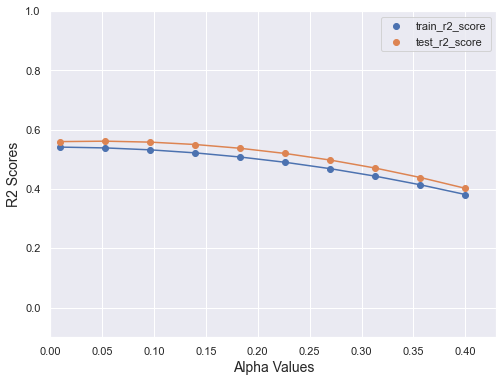

In [501]:
#Plotting Graph between R2_score and Alpha Values as per taken dataset
plt.figure(figsize=(8,6))

#Using Scatter plot to represent train_r2_scores with Alpha values
plt.scatter(alpha,train_r2_score,label='train_r2_score')
plt.plot(alpha,train_r2_score)

#Using Scatter plot to represent test_r2_scores with Alpha values
plt.scatter(alpha,test_r2_score,label='test_r2_score')
plt.plot(alpha,test_r2_score)

#Setting up X-limit and y-limit
plt.ylim(-0.1,1)
plt.xlim(0,.43)

#Setting up X-label and y-labels
plt.xlabel('Alpha Values', size = 14)
plt.ylabel('R2 Scores',size = 14)
plt.legend()

#Showing plot
plt.show()

Text(0, 0.5, 'Coefficients')

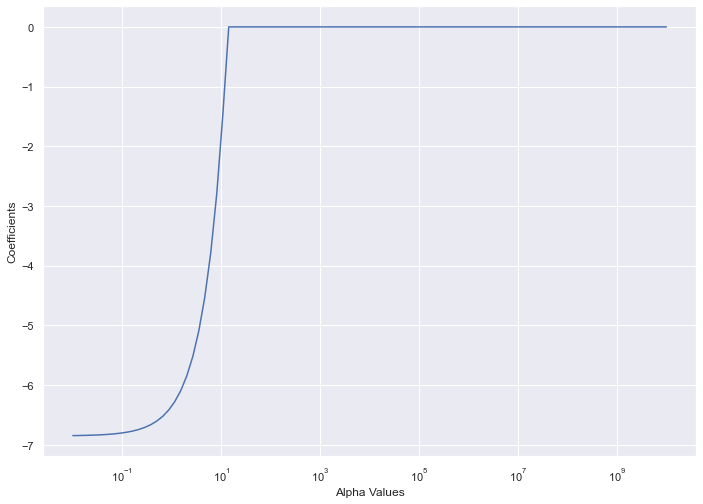

In [502]:
from sklearn.preprocessing import scale

 
alpha = np.linspace(0.01,0.4,10)

#Using Lasso()
lasso = lasso_model
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    
    #Fitting X_train and y_train values for scaling 
    lasso.fit(scale(X_train), y_train)
    
    #Appending Coefficients for each 
    coefs.append(lasso.coef_)

#Get Current Axis plot
Axis = plt.gca()

#Plotting a graph between Alpha values and coefficient values
Axis.plot(alphas*2, coefs)

#Setting Axis xscale as log value
Axis.set_xscale('log')
plt.axis('tight')

#Assigning X and y labels
plt.xlabel('Alpha Values')
plt.ylabel('Coefficients')

## 2. Using Hitters Salary Dataset

#### Loading Dataset

In [503]:
#Path for datset
import os
dataset_path = os.path.join("dataset")

#Function to load and return dataset path
def load_hitters_dataset(dataset_hitters=dataset_path):
    csv_path = os.path.join(dataset_hitters, "Hitters.csv")
    return pd.read_csv(csv_path)

In [504]:
#Reading Dataset and displaying head
dataset = load_hitters_dataset()
dataset.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [505]:
#Printing dataset tail
dataset.tail()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A
321,-Willie Wilson,631,170,9,77,44,31,11,4908,1457,...,775,357,249,A,W,408,4,3,1000.0,A


#### Plotting Histograms

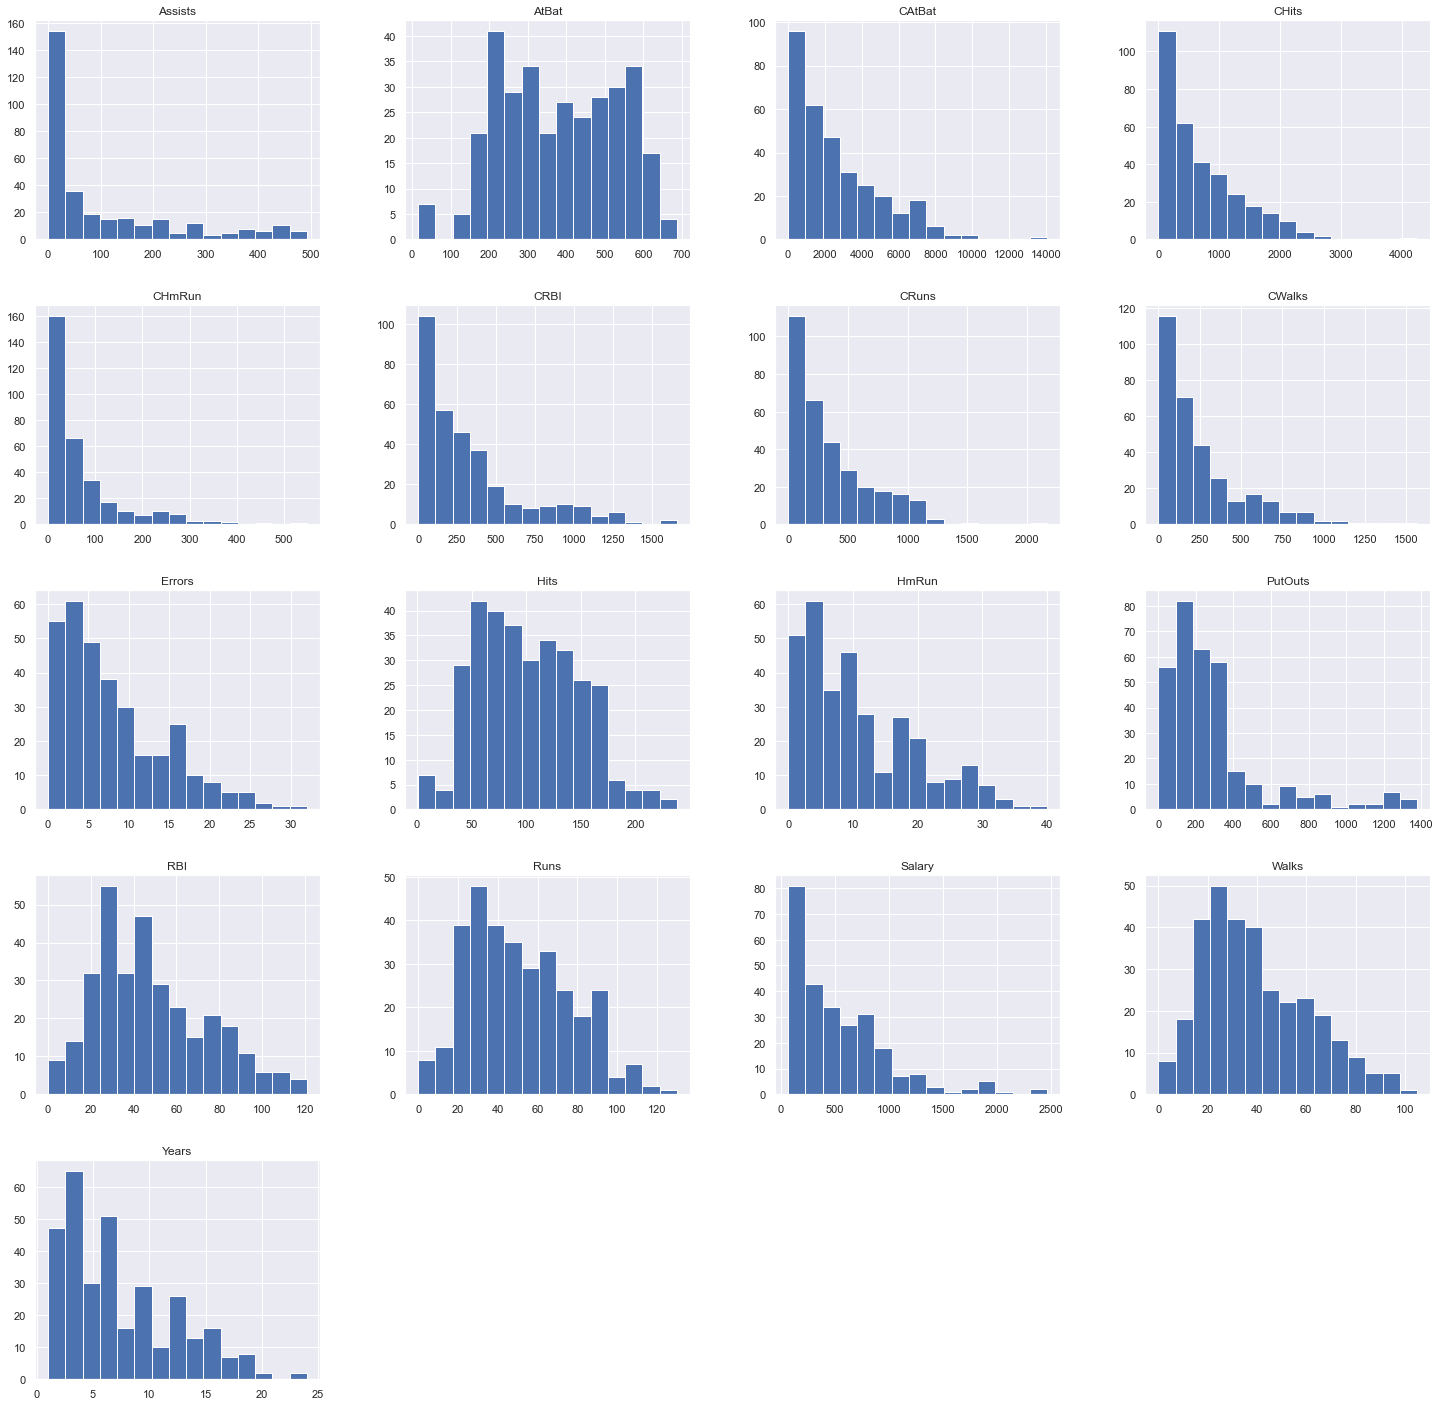

In [506]:
#PLotting Histograms for each column in hitters dataset 
dataset.hist(bins=15, figsize=(25,25))
plt.show()

In [507]:
#Checking Shape
dataset.shape

(322, 21)

* Dataset comprises of 322 observations and 21 chracteriestics
* Out of which one is dependent variable and rest are independent variables

In [508]:
#Label of each Column is observed
dataset.columns.values

array(['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks',
       'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks',
       'League', 'Division', 'PutOuts', 'Assists', 'Errors', 'Salary',
       'NewLeague'], dtype=object)

In [509]:
#Hitters dataset info 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

* Data has object, float and integer values

* describe() method - Pandas describe() is used to view some basic statistical details like percentile, mean, std for integer values of columns on dataset

* Remove columns under object as datatype like League, Division, NewLeague and Unnamed: 0 

In [510]:
#Hitters dataset describe check

dataset.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


#### Understanding Target variable

In [511]:
#Here target variable is Salary
dataset.Salary.unique() 

array([     nan,  475.   ,  480.   ,  500.   ,   91.5  ,  750.   ,
         70.   ,  100.   ,   75.   , 1100.   ,  517.143,  512.5  ,
        550.   ,  700.   ,  240.   ,  775.   ,  175.   ,  135.   ,
        115.   ,  600.   ,  776.667,  765.   ,  708.333,  625.   ,
        900.   ,  110.   ,  612.5  ,  300.   ,  850.   ,   90.   ,
         67.5  ,  180.   ,  305.   ,  215.   ,  247.5  ,  815.   ,
        875.   , 1200.   ,  675.   ,  415.   ,  340.   ,  416.667,
       1350.   ,  275.   ,  230.   ,  225.   ,  950.   ,  105.   ,
        320.   ,  535.   ,  933.333,  210.   ,  325.   ,  450.   ,
       1975.   , 1900.   , 1041.667,  260.   ,  431.5  , 1220.   ,
        145.   ,  595.   , 1861.46 ,  490.   , 2460.   ,  375.   ,
       1175.   , 1500.   ,  385.   , 1925.571,  155.   ,  362.5  ,
        733.333,  200.   ,  400.   ,  737.5  ,  662.5  ,  297.5  ,
         87.5  , 1237.5  ,  430.   ,  165.   ,  250.   , 1300.   ,
        773.333, 1008.333,  365.   ,   95.   ,  277.5  ,   80.

In [512]:
#Value counts
dataset.Salary.value_counts()

750.000     8
250.000     6
100.000     6
90.000      6
450.000     5
           ..
305.000     1
431.500     1
247.500     1
415.000     1
2127.333    1
Name: Salary, Length: 150, dtype: int64

In [513]:
# Calculate max number of features for training 
np.sqrt(dataset.shape[0])

17.944358444926362

### Exploratory Data Analysis Starts
The purpose of exploratory data analysis is to check for missing data and other mistakes. Gain maximum insight into the data set and its underlying structure. Uncover a parsimonious model, one which explains the data with a minimum number of predictor variables.

#### To check missing values

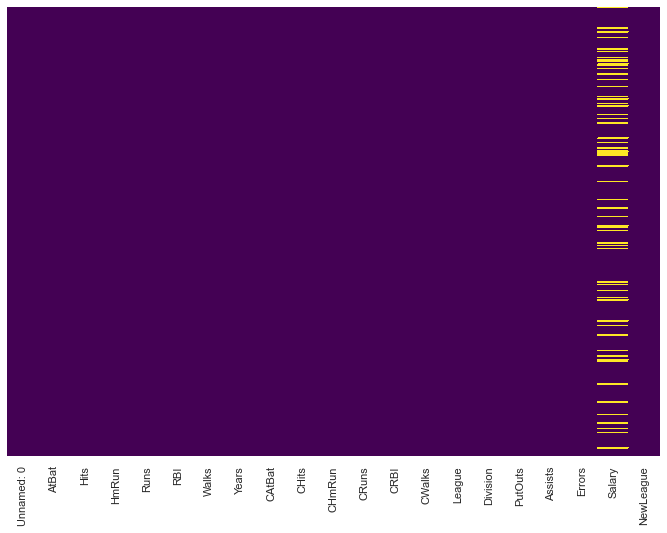

In [514]:
#To Check the missingvalues using heatmap
sns.heatmap(dataset.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

* Having NAN values under Salary column, using sum and fillna function we will fix it.

#### To check correlation

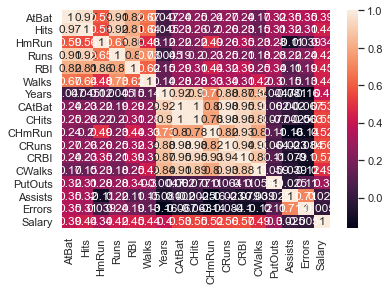

In [515]:
#Checking correlation
plt.figure(figsize=(6,4))
sns.heatmap(dataset.corr(),annot=True) 

* Dark shades represents positive correlation while lighter shades represents negative correlation.
* By setting annot=True, you'll get values by which features are correlated to each other in grid-cells

In [516]:
#Function to check missing values
def show_na_sum(df, column):
    '''
    Shows a count of missing values in a specific column
    '''
    return df[column].isna().sum()

show_na_sum(dataset, 'Salary')

59

In [517]:
#Function to fix missing points
def fix_na(df, column, value):
    '''
    Fill missing data points with a specific function
    '''
    df[column] = df[column].fillna(value)
    
fix_na(dataset, 'Salary', dataset['Salary'].mean())

#### To check missing values after fixing

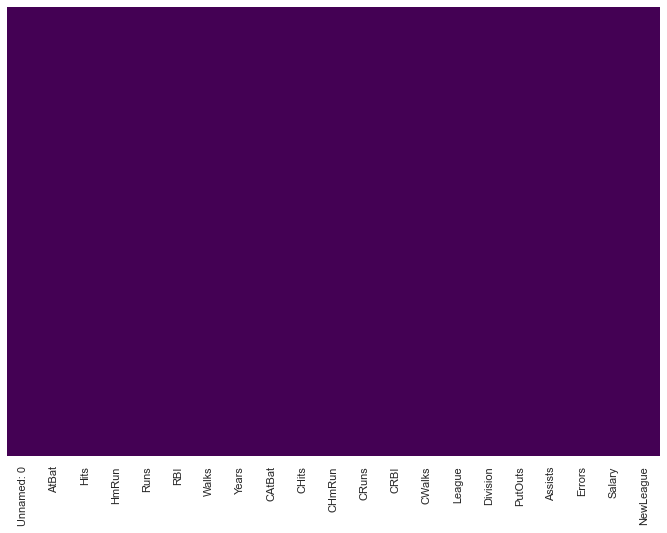

In [518]:
#To Check the missing values using heatmap
sns.heatmap(dataset.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

* Now, we are free with missing values.

#### Feature Engineering

In [519]:
# Drop the columns having object as its data type with salary(target variable)
X_drop_dataset = dataset.drop(['Salary', 'League', 'Division', 'NewLeague', 'Unnamed: 0'], axis = 1)
X = X_drop_dataset
print("Object datatype related columns are droped")

Object datatype related columns are droped


In [520]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4


In [521]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   AtBat    322 non-null    int64
 1   Hits     322 non-null    int64
 2   HmRun    322 non-null    int64
 3   Runs     322 non-null    int64
 4   RBI      322 non-null    int64
 5   Walks    322 non-null    int64
 6   Years    322 non-null    int64
 7   CAtBat   322 non-null    int64
 8   CHits    322 non-null    int64
 9   CHmRun   322 non-null    int64
 10  CRuns    322 non-null    int64
 11  CRBI     322 non-null    int64
 12  CWalks   322 non-null    int64
 13  PutOuts  322 non-null    int64
 14  Assists  322 non-null    int64
 15  Errors   322 non-null    int64
dtypes: int64(16)
memory usage: 40.4 KB


In [522]:
#y varibale is a target variable Salary
y = dataset.Salary

#Printing y
y

0       535.925882
1       475.000000
2       480.000000
3       500.000000
4        91.500000
          ...     
317     700.000000
318     875.000000
319     385.000000
320     960.000000
321    1000.000000
Name: Salary, Length: 322, dtype: float64

#### Train split data

In [523]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

* Hence spliting is done

In [524]:
#Printing X_train
X_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
47,205,57,8,34,32,9,5,756,192,32,117,107,51,58,4,4
113,574,152,31,91,101,64,3,985,260,53,148,173,95,1253,111,11
244,466,108,33,75,86,72,3,652,142,44,102,109,102,286,8,8
40,181,41,1,15,21,33,2,232,50,4,20,29,45,326,29,5
21,426,109,3,55,43,62,1,426,109,3,55,43,62,361,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,243,53,4,18,26,27,4,853,228,23,101,110,76,107,3,3
255,246,76,5,35,39,13,6,912,234,12,102,96,80,44,0,1
72,512,131,26,69,96,52,14,5347,1397,221,712,815,548,119,216,12
235,551,160,23,86,90,87,5,2235,602,75,278,328,273,1224,115,11


In [525]:
#Printing X_test
X_test

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
262,275,68,5,42,42,61,6,961,238,16,128,104,172,181,3,2
174,184,47,5,20,28,18,11,3327,890,74,419,382,304,49,2,0
157,401,100,2,60,19,28,4,876,238,2,126,44,55,193,11,4
246,462,119,16,49,65,37,7,2131,583,69,244,288,150,866,65,6
150,225,61,5,32,26,26,11,1568,408,25,202,185,257,132,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,374,94,5,36,26,62,7,1968,519,26,181,199,288,756,64,15
306,127,32,4,14,25,12,19,8396,2402,242,1048,1348,819,167,18,6
315,593,172,22,82,100,57,1,593,172,22,82,100,57,1222,139,15
263,627,178,14,68,76,46,6,3146,902,74,494,345,242,309,492,5


In [526]:
#Printing y_train
y_train

47     247.500000
113    215.000000
244    215.000000
40      67.500000
21     115.000000
          ...    
203    535.925882
255    250.000000
72     850.000000
235    535.925882
37      90.000000
Name: Salary, Length: 161, dtype: float64

In [527]:
#Printing y_test
y_test

262     191.000000
174     450.000000
157     535.925882
246     535.925882
150     535.925882
          ...     
218     875.000000
306     500.000000
315     165.000000
263     740.000000
234    1260.000000
Name: Salary, Length: 161, dtype: float64

## Lasso Regression 
#### Model Fitting

In [528]:
#Fitting model X_train and y_train
lasso_regressor.fit(X_train, y_train)

#Printing Lasso regressor best alpha value to be taken.
alpha_value = lasso_regressor.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3531733.3918014998, tolerance: 1548.7060826161564
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4248207.906539783, tolerance: 1759.8587229660457
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3794674.4627651786, tolerance: 1831.6372589747489
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3692337.7831686367, tolerance: 1831.6372589747489
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3699115.819789757, tolerance: 1734.0519651894756
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4470443.764727913, tolerance: 1883.2343885465023
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1291320.7193305506, tolerance: 1759.8587229660457
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353051.3196883416, tolerance: 1831.6372589747489
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2131377.3132332745, tolerance: 1734.0519651894756
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

In [529]:
print("Printing Lasso regressor best alpha value", alpha_value)

Printing Lasso regressor best alpha value {'alpha': 20}


* Here in Hitters dataset, Alpha value is considered as **20** to be considered

In [530]:
#Predictions

prediction_lasso=lasso_regressor.predict(X_test)

prediction_lasso

array([ 288.09570674,  376.43385344,  316.97452975,  622.67037606,
        338.90925012,  333.79017769,  927.47224137, 1446.81879063,
        827.47801811,  227.62173607,  313.61060194,  666.2564586 ,
        180.22251427,  489.54313854,  351.53781794,  969.81409417,
        374.37267602,  448.58592199,   89.31425314,  526.13936325,
        415.17782859,  330.46031592,  334.10439695,  210.23209935,
        870.83174268,  704.04762458,  301.74900576,  786.36897818,
        634.00215754,  310.53948256, 1228.58165755,  783.95374771,
        542.34016407,  581.3619774 ,  571.27975671,  899.65754144,
        189.02702033,  399.54483957,  643.06024812,  486.90166669,
        868.98859374,  621.37364451,  583.79685112,  480.7734986 ,
        874.50722825,  596.47936443,  633.04289073,  403.05726511,
        141.02177967,  395.49029634,  267.38482544,  432.63788837,
        132.9038278 ,  775.91018968,  293.89689337,  193.42790258,
        874.33904316,  577.39875624,  531.73305721,  550.15135

In [531]:
#X_Train Predict 
from sklearn.metrics import r2_score

pred_train_lasso= lasso_regressor.predict(X_train)

train_r2_score_lasso = r2_score(y_train, pred_train_lasso)

print("Printing Hitters Train r2 score Lasso:", train_r2_score_lasso)

Printing Hitters Train r2 score Lasso: 0.5261847157171167


In [532]:
#X_test predict

pred_test_lasso= lasso_regressor.predict(X_test)

test_r2_score_lasso = r2_score(y_test, pred_test_lasso)

print("Printing Hitters Test r2 score Lasso:", test_r2_score_lasso)

Printing Hitters Test r2 score Lasso: 0.28272475387729734


* Those are the r2 and MSE scores of both Train & Test data

### Visualization

* R2score and Alpha values comparision graph
* Inorder to fit we need to do StandardScaler with fit transform to Predict the X_train and X_test values

In [533]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()


X_train_scl = scl.fit_transform(X_train)
X_test_scl = scl.transform(X_test)
y_train_scl = scl.fit_transform(y_train[:, np.newaxis]).flatten()


from sklearn.metrics import r2_score
alpha = np.linspace(0.01,0.4,10)
train_r2_score =[]
test_r2_score =[]

for i in range(10):
    
    #Using lasso model
    lasso = Lasso(alpha = alpha[i])
    
    #Fitting X_train and y_train scaler values
    lasso.fit(X_train_scl,y_train_scl)
    
    #Predicting X_train and X_test values
    train_pred = lasso.predict(X_train_scl)
    test_pred = lasso.predict(X_test_scl)
    
    #Appending each y_train r2 score values
    train_r2_score = np.append(train_r2_score,
              r2_score(y_train,scl.inverse_transform(train_pred)))
    
    #Appending each y_test r2 score values
    test_r2_score = np.append(test_r2_score,
              r2_score(y_test,scl.inverse_transform(test_pred)))


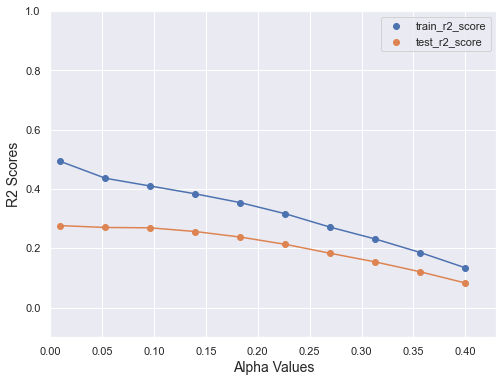

In [534]:
#Plotting Graph between R2_score and Alpha Values as per taken dataset
plt.figure(figsize=(8,6))

#Using Scatter plot to represent train_r2_scores with Alpha values
plt.scatter(alpha,train_r2_score,label='train_r2_score')
plt.plot(alpha,train_r2_score)

#Using Scatter plot to represent test_r2_scores with Alpha values
plt.scatter(alpha,test_r2_score,label='test_r2_score')
plt.plot(alpha,test_r2_score)

#Setting up X-limit and y-limit
plt.ylim(-0.1,1)
plt.xlim(0,.43)

#Setting up X-label and y-labels
plt.xlabel('Alpha Values', size = 14)
plt.ylabel('R2 Scores',size = 14)
plt.legend()

#Showing plot
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11722.856179464608, tolerance: 2191.071815203513
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24343.73929575458, tolerance: 2191.071815203513
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189036.8896477595, tolerance: 2191.071815203513
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

Text(0, 0.5, 'Coefficients')

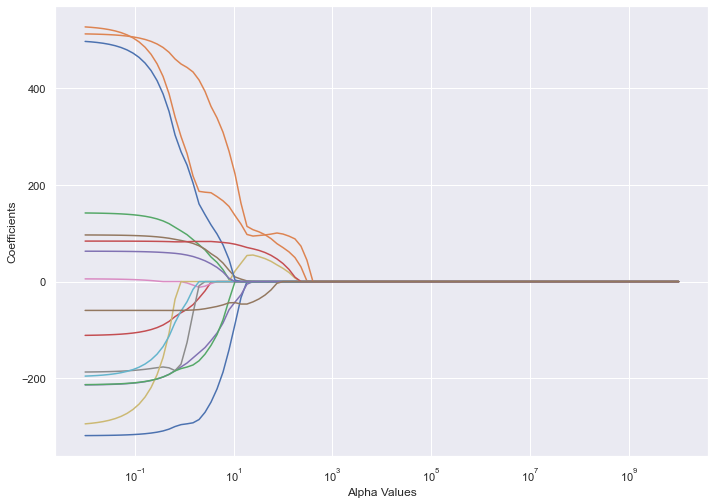

In [535]:
from sklearn.preprocessing import scale

# Using Hitters dataset
alpha = np.linspace(0.01,0.4,10)

#Using Lasso()
lasso = lasso_model
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    
    #Fitting X_train and y_train values for scaling 
    lasso.fit(scale(X_train), y_train)
    
    #Appending Coefficients for each 
    coefs.append(lasso.coef_)

#Get Current Axis plot
Axis = plt.gca()

#Plotting a graph between Alpha values and coefficient values
Axis.plot(alphas*2, coefs)

#Setting Axis xscale as log value
Axis.set_xscale('log')
plt.axis('tight')

#Assigning X and y labels
plt.xlabel('Alpha Values')
plt.ylabel('Coefficients')

* Hence the two datasets are used in this Notebook for better understanding. 